$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

*Name : Pratik Warade*

## Overview

In this assignement, I am going to  write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results.  I will apply once for regression problem and once for a classification problem. 

## Understanding of Concepts
### What is neural network?
To know what is neural network are we first need to know what is neuron? So the neuron can be define  like a function; that takes a few inputs and calculates an output. Each neuron in the brain recieves a input from other neurons. Few of them also connects to receptors that is use for backtracking. The effect of each input on the nueron is controlled by synaptic weight(which can be positive or negative).Synaptic weight adapt, so that the whole network learns to perform useful computation.


If you connect a network of these neurons together, you have a neural network, which propagates forward — from input output, via neurons which are connected to each other through synapses, like on the image below.

<img src="http://www.texample.net/media/tikz/examples/PNG/neural-network.png">
## Architectures and Methods of Artificial Neural Networks
The most well known classes of Artificial Neural Network are the feed-forward, the feedback and the recurrent neural networks.

### Feed-forward networks
Feed-forward networks depicted in figure ablove  are characterized by the layout and behaviour of their inner nodes as seen on figure below
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png">

Input :-                                                                                                                              

Typically, these values are external stimuli from the environment or come from the outputs of other artificial neurons. They can be discrete values from a set, such as {0,1}, or real-valued numbers

Weights :-                                                                                                                         
These are real-valued numbers that determine the contribution of each input to the neuron's weighted sum and eventually its output. The goal of neural network training algorithms is to determine the best possible set of weight values for the problem under consideration. Finding the optimal set is often a trade-off between computation time and minimizing the network error.

Threshold (θ)   :-                                                                                                                
The threshold is referred to as a bias value. In this case, the real number is added to the weighted sum. For simplicity, the threshold can be regarded as another input / weight pair, where w0 = u and x0 = -1.

Activation Function :-                                                                                                         
The activation function for the original McCulloch-Pitts neuron was the unit stepfunction. However, the artificial neuron model has been expanded to include other functions such as the sigmoid, piecewise linear, and Gaussian.


* Their nodes are arranged in input, output and middle layers with the last hidden from the outside.
* Each node in every layer is connected to every other node in the next layer.
* This guarantees the constant forward flow of information between layers.
* Nodes within the same layer are totally isolated from one another.

There is  transfer function which is use to choose to have a number of properties which either enhance or simplify the network containing the neuron, whose input is given to activation function with threeshold value. Here the learning process occurs when a sample of input-output pairs is fed into the network repeatedly until it “learns” the relationship between the elements. This process is called supervised learning in feed-forward Artificial Neural Network.

### Recurrent  Neural Network

A recurrent neural network(RNN), in contrast to its  feed-forward counterpart,  processes any sequence of inputs and organizes its connections between units in the shape of a directed cycle  to display a dynamic temporal behaviour. This ability makes RNN very suitable to tasks such as natural handwriting recogniti


This model produces an output for each sample present as an input vector. This is fine when all of the information relevant for producing an approximately correct output is included in the input vector.  We can add  units that can learn to remember activity from past inputs. Dynamics are added by simply feeding the output of the hidden units back to the hidden units as inputs, making a cycle in the calculations. Here's a picture.





### Applications Of Artificial Neural Network
* Data Conceptualization
   * infer grouping relationships
      e.g extract from a database the names of those most likely to buy a particular product
* Data Filtering  e.g  take the noise out of a telephonr signal, signal processing
* Planning 
 * Unknown enviroment
 * Sensor data is noisy
 *  Fairly new apporach to planning
* Prediction: Learning from past expirence
 * Pick the best stocks in the internet
 * Predict weather
 * Identity people with concern risk
* Classification
 * Image Processing
 * Predict bankruptcy for credit card companies
 * Risk assesment
 * Handwritting processing checks
* Data association
 * Not only identity the characters that were scanned but identy when the scannner is not working properly.

## Required Code

Download [nn2.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar) that was used in lecture and extract its contents, which are

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

The following functions that train and evaluate neural network models.

* `results = trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify)`

The arguments to `trainNNs` are

* `X` is a matrix of input data of shape `nSamples x nFeatures`
* `T` is a matrix of target data of shape `nSamples x nOutputs`
* `trainFraction` is fraction of samples to use as training data. 1-`trainFraction` is number of samples for testing data
* `hiddenLayerStructures` is list of network architectures. For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 5, 10, and 20 units in each layer, this argument would be `[[20], [5, 10, 20]]`.
* `numberRepetitions` is number of times to train a neural network.  Calculate training and testing average performance (two separate averages) of this many training runs.
* `numberIterations` is the number of iterations to run the scaled conjugate gradient algorithm when a neural network is trained.
* `classify` is set to `True` if you are doing a classification problem, in which case `T` must be a single column of target class integers.

This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 

* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure.

### Algorithm for TrainNN

  * For each network structure given in `hiddenLayerStructures`
    * For numberRepetitions
      * Use `ml.partition` to randomly partition X and T into training and testing sets.
      * Create a neural network of the given structure
      * Train it for numberIterations
      * Use the trained network to produce outputs for the training and for the testing sets
      * If classifying, calculate the fraction of samples incorrectly classified for training and testing sets.
       Otherwise, calculate the RMSE of training and testing sets.
      * Add the training and testing performance to a collection (such as a list) for this network structure
    * Add to a collection of all results the hidden layer structure, lists of training performance and testing performance, and seconds taken to do these repetitions.
  * return the collection of all results

In [1]:
# Required imports

import matplotlib.pyplot as plt
import mlutils as ml # for ml.paritition
%matplotlib inline
import time
import numpy as np
import neuralnetworks as nn
import pandas as pd


In [2]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify):   
    #final list to return 
    final_res=[]
    for hiddenLayer in hiddenLayerStructures:
        #required tmp. lists
        results=[]
        scoretrainlist = []
        scoretestlist = []
        rmsetrainlist =[]
        rmsetestlist =[]
        #start time clock to measure time took for patricular hidden structure
        start = time.time()
        for iteration in range(1,numberRepetitions+1):
            #partition data using mlutils
            Xtrain,Ttrain, Xtest, Ttest= ml.partition(X,T,(trainFraction,1-trainFraction),classification=classify) #training input,
            #check wheather classification is T or F
            if(classify==False):                
                NN = nn.NeuralNetwork(X.shape[1], hiddenLayer, T.shape[1])
            else:               
                NN = nn.NeuralNetworkClassifier(X.shape[1], hiddenLayer, len(np.unique(T)))          
            NN.train(Xtrain, Ttrain, iteration)
            #get Output for train and test
            Y = NN.use(Xtrain) # training data predi
            Ytest = NN.use(Xtest) #
            if classify==True :
                #for classification get fraction of samples incorrectly classified 
                scoretrain = np.sqrt(np.mean((Y-Ttrain)**2)) if not classify else np.mean(Y!=Ttrain)
                scoretest = np.sqrt(np.mean((Ytest-Ttest)**2)) if not classify else np.mean(Ytest!=Ttest)
                #scoretest = (1-(ml.percentCorrect(Ytest, Ttest))/100) # testing data score
                #scoretrain =(1- (ml.percentCorrect(Y, Ttrain))/100  )   # traininh data score
                scoretrainlist.append(scoretrain)
                scoretestlist.append(scoretest)
            else: 
                #calculate RMSE 
                rmsetest = np.sqrt(np.mean((Ytest-Ttest)**2))
                rmsetrain = np.sqrt(np.mean((Y-Ttrain)**2))
                rmsetrainlist.append(rmsetrain)
                rmsetestlist.append(rmsetest)
       
        results.append(hiddenLayer)
        #Update and get final list
        if(classify==True):
            results.append(scoretrainlist)
            results.append(scoretestlist)
        else:            
            results.append(rmsetrainlist)
            results.append(rmsetestlist)            
        
        end = time.time()     #end time clock
        time_sec=(end -start) #calculate total time taken
        results.append(time_sec)
        final_res.append(results)        
    return  final_res          

Following two fuctions are:  
* `summarize(results)` returns a list of lists like `results` but with the list of training performances replaced by their mean and the list of testing performances replaced by their mean and   
* `bestNetwork(summary)` takes the output of `summarize(results)` and returns the best element of `results`, determined by the element that has the smallest test performance.



In [3]:
def summarize(results):
    for l in results: #calculate mean of element that are at index 1 and 2, for each list 
        l[1]=np.mean(l[1])
        l[2]=np.mean(l[2])
    return(results)
        
    
def bestNetwork(test):
    list_of_testerror=[]
    for lis in test:
        list_of_testerror.append(lis[2]) #get all values at index 2
    min_list=min(list_of_testerror)     # get min of all values
    for lis in test:  
        if( lis[2]==min_list):         #match each element of index 2 with min_list and return lis
            return lis
   

## Examples


In [4]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

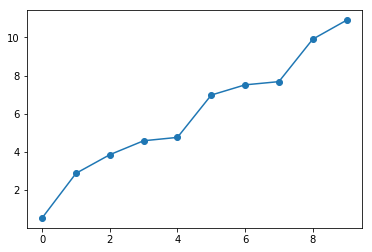

In [5]:
plt.plot(X, T, 'o-');

In [6]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.21431204,  0.17796946,  0.16991416,  0.16628745,
        0.14445356,  0.14272374,  0.14208986,  0.14170243,  0.14135593,
        0.14135593,  0.14135593,  0.14135593,  0.14135593,  0.14135593,
        0.14135593,  0.14135593,  0.14135593,  0.14135593,  0.14135593,
        0.14016577,  0.1372689 ,  0.13698859,  0.13422666,  0.13366455,
        0.13360965,  0.13262015,  0.13230249,  0.13215836,  0.13201464,
        0.13190728,  0.13182826,  0.13179555,  0.13173584,  0.13173584,
        0.13173584,  0.13173584,  0.13173584,  0.13173584,  0.13173584,
        0.1297782 ,  0.12977038,  0.12588623,  0.12484243,  0.12402119,
        0.12325562,  0.12319683,  0.12319683,  0.12319683,  0.12319683,
        0.12319683,  0.12115211,  0.12000843,  0.11742002,  0.11349561,
        0.11195584,  0.11135795,  0.1108066 ,  0.11014003,  0.11006459,
        0.10631657,  0.10581747,  0.10569047,  0.1056368 ,  0.10549072,
        0.10527646,  0.10515518,  0.10500957,  0.10499508,  0.10

In [7]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.67180046,  0.67180046,  0.63775619,  0.55637634,
        0.30529016,  0.20483834,  0.20181518,  0.19295478,  0.1894782 ,
        0.18524524,  0.1576874 ,  0.1531239 ,  0.14169251,  0.14046052,
        0.13946806,  0.1320795 ,  0.13147778,  0.12843436,  0.12421651,
        0.123803  ,  0.12314062,  0.12080103,  0.11913633,  0.11913613,
        0.11081727,  0.10966414,  0.10439132,  0.10429457,  0.10380726,
        0.10333164,  0.10330323,  0.10327505,  0.10315365,  0.10309647,
        0.10300128,  0.10245222,  0.10169692,  0.10132808,  0.0998344 ,
        0.09971288,  0.09970592,  0.09961   ,  0.09947009,  0.09938941,
        0.0991251 ,  0.09903301,  0.09899104,  0.09897444,  0.09884668,
        0.098794  ,  0.09875098,  0.09690246,  0.09685313,  0.0961449 ,
        0.0958927 ,  0.09583124,  0.09572812,  0.0957053 ,  0.09569738,
        0.09569337,  0.0956772 ,  0.0956061 ,  0.09556748,  0.09554529,
        0.09552971,  0.09550461,  0.09550117,  0.09549869,  0.09

In [8]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [3.095164280875081,
   0.81092357338918086,
   0.57916151056585397,
   0.51516978848682771,
   0.6696600940319587],
  [2.6645254501739295,
   0.32092608852013921,
   0.64604460943218167,
   1.3886717381160731,
   0.8079760547277921],
  0.011007308959960938],
 [10,
  [0.92467278839313027,
   0.59232586812321442,
   0.5299941214868984,
   0.36285701246665109,
   0.51395670261558868],
  [1.7841034281162595,
   0.84182022952280833,
   0.8980476516826067,
   1.710950642752062,
   0.86279342983778973],
  0.009007453918457031],
 [[10, 10],
  [1.3025752441150855,
   0.71208377399601197,
   0.51424016089673885,
   1.8899823600413366,
   0.70375539376397855],
  [1.7795664162688953,
   1.2346397000822344,
   1.5627966083804947,
   1.9495742070555566,
   0.70234810052609686],
  0.01701188087463379]]

In [9]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [10]:
summarize(results)

[[0, 0.51482065351512452, 0.61579154641415246, 0.07805490493774414],
 [1, 0.68517760542665695, 1.0056759403409956, 0.36025571823120117],
 [2, 0.68136619217868544, 0.91756662971231517, 0.31824207305908203],
 [10, 0.45930637127938584, 0.80478458551121979, 0.4573049545288086],
 [[10, 10], 0.43985184952984313, 1.0345993818529235, 0.5563931465148926],
 [[5, 5, 5, 5], 0.78980641843800992, 1.2346536658294367, 0.7795512676239014],
 [[2, 2, 2, 2, 2], 1.0611590502106849, 1.3478284742315076, 0.8996391296386719]]

In [11]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.51482065351512452, 0.61579154641415246, 0.07805490493774414]
Hidden Layers 0 Average RMSE Training 0.51 Testing 0.62 Took 0.08 seconds


Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

Ans:  According to me, the above simple data set look kind of normal. And because of that, even RMSE can model with better results.

## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



In [12]:
# Read .csv using pandas package
df1=pd.read_csv("energydata_complete.csv",header=None)
cols = [0,27,28]         # Make list of col that are not needed
df1.drop(df1.columns[cols],axis=1,inplace=True)     # Drop columns
names_lists=df1[0:1].values.tolist()                
names=names_lists[0]                                # Get names

In [13]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [14]:
d=df1.drop(df1.index[[0]])  # drop first row/header
tmp=d.values                # change to numpy array
data=tmp.astype(np.float)   # change strings to float


In [15]:
data.shape

(19735, 26)

In [16]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

In [17]:
data.shape

(19735, 26)

In [18]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

Labelling `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features. 

In [19]:
Tenergy= data[:,:2]     
Tnames = names[:2]

Xenergy = data[:,2:26]
Xnames=names[2:]


In [20]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [21]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [22]:
Tnames

['Appliances', 'lights']

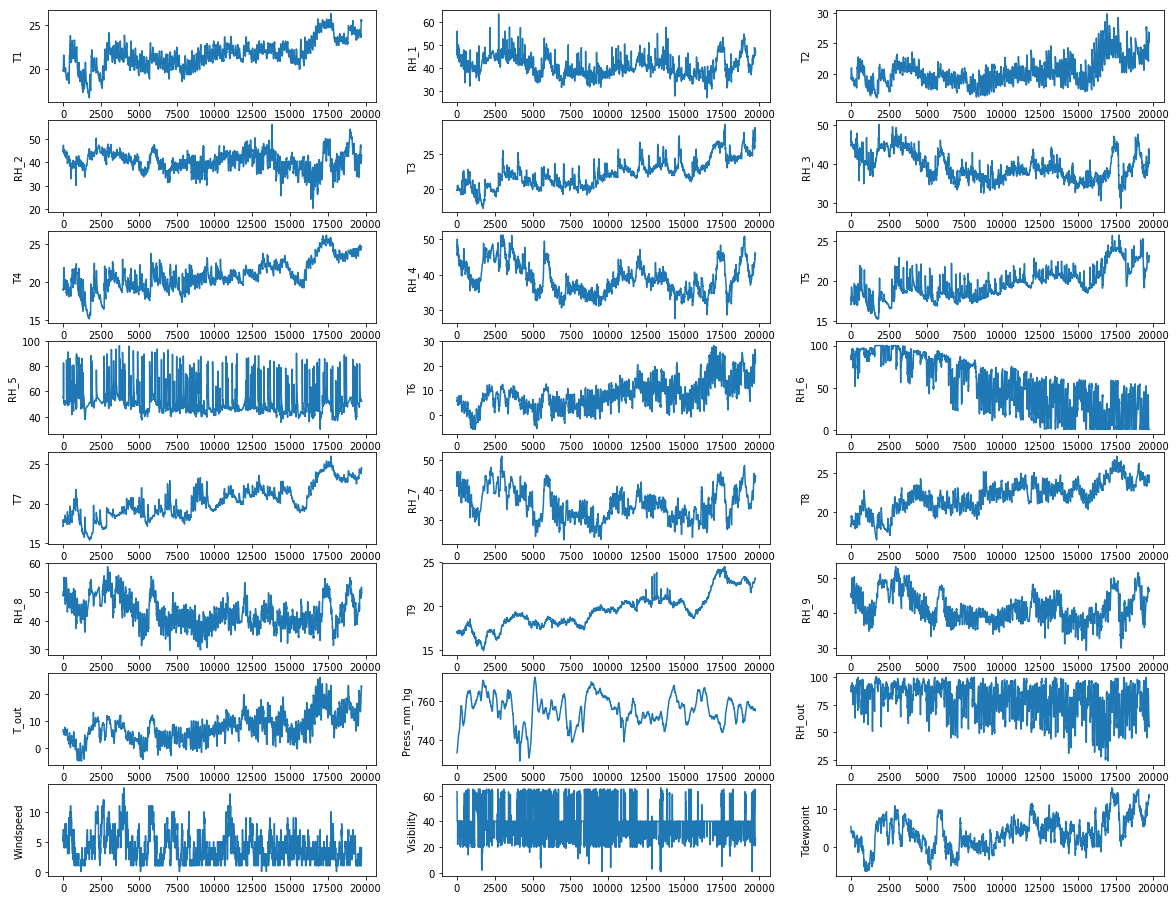

In [23]:
plt.figure(figsize=(20,20))
nrow,ncol = Xenergy.shape
for i in range(ncol):
    plt.subplot(10,3, i+1)
    plt.plot(Xenergy[:,i])
    plt.ylabel(Xnames[i])
    



After visualizing data, we can see a trend that a single feature can used to predict outcome. So, we need to combine different features and use to predict outcomes.

After trying for several iteration, I found that after 170 iteration might be best choice as after 170 the eroor rate remains constant.

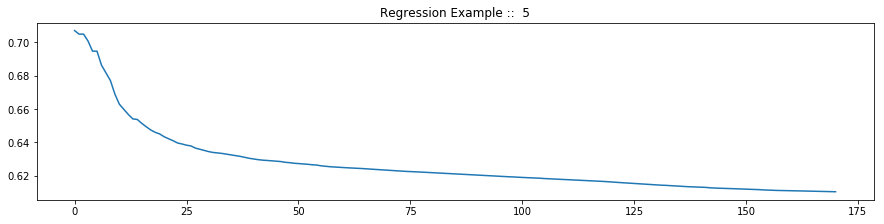

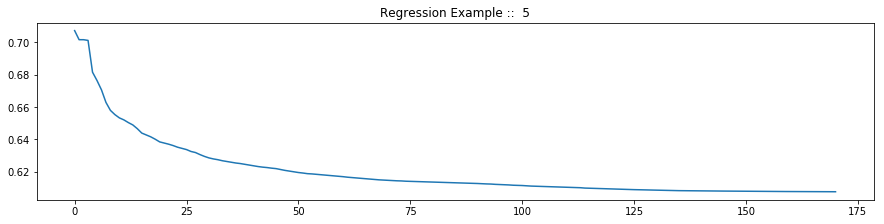

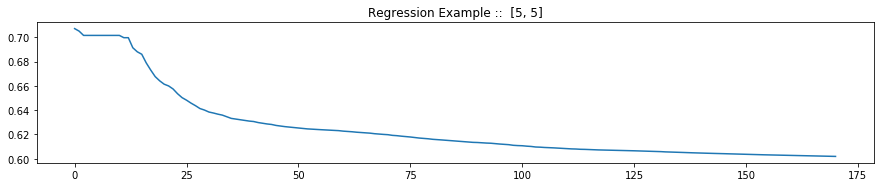

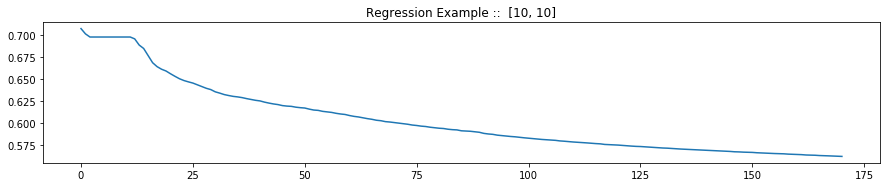

In [24]:
hiddenLayers=[ 5,5, [5, 5], [10, 10]]
for hiddenlayer in hiddenLayers:
    Xtrain,Ttrain, Xtest, Ttest= ml.partition(Xenergy,Tenergy,(0.8,0.2),classification=False)
    nnet = nn.NeuralNetwork(Xenergy.shape[1],hiddenlayer, Tenergy.shape[1])
    nnet.train(Xtrain, Ttrain, 170)
    
    Y =nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    Get_err=nnet.getErrorTrace()
    plt.figure(figsize=(15, 15))
    if(nnet.nhs==None):
        nnet.nhs=[0]
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers
    plt.subplot(nPlotRows, 1, 1)
    plt.plot(Get_err)
    plt.title('Regression Example ::  ' + str(hiddenlayer))
  


In [25]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 170,classify=False)

In [26]:
summarize(results)

[[0, 68.832985143486638, 68.364693854965481, 0.5844125747680664],
 [5, 71.550921452867087, 70.142473195039798, 1.6551713943481445],
 [[5, 5], 71.466417020528837, 70.931807086032094, 2.227576732635498],
 [[10, 10], 72.053648423389276, 70.138120805185793, 3.171243906021118]]

In [27]:
bestNetwork(summarize(results))

[0, 68.832985143486638, 68.364693854965481, 0.5844125747680664]

Now, let train for 10 hidden layer structure and find out which one works good.

In [28]:
results = trainNNs(Xenergy, Tenergy, 0.6, [1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]], 10, 100,classify=False)

In [29]:
summarize(results)

[[1, 71.987633838614755, 72.094399207065436, 1.068756103515625],
 [2, 71.485441259821812, 72.605906493117658, 0.8415954113006592],
 [5, 71.597449418218318, 71.52949259051698, 1.1269149780273438],
 [10, 71.659297081526873, 70.111749247329087, 1.548008680343628],
 [20, 71.37527871948005, 71.772096613342825, 2.729931116104126],
 [[5, 5], 71.817614752617416, 71.447500379579694, 1.388983964920044],
 [[10, 7], 70.931880495010532, 72.414169406160482, 2.188549041748047],
 [[10, 10], 71.706612747615594, 70.885294471696056, 2.275609016418457],
 [[10, 2, 10], 72.108757672167286, 72.236738936226502, 2.3126373291015625],
 [[10, 20, 100], 71.62647066135419, 71.078286509324215, 12.258676052093506]]

In [30]:
bestNetwork(summarize(results))

[10, 71.659297081526873, 70.111749247329087, 1.548008680343628]

From above result, hidden layer with 20 structures work best and gives minimum testing data performance.   

`Larger numbers of layers and units may do the best on training data, but not on testing data. Why?`  
Ans: The simple reason is overfitting of data.Overfitting often happens when your train your model with too much data. Then the model learn from the noise and inaccurate data entries from the data set. If the model then should predict the target of the new data, it does not categorize the data correct, because there is too much noise and details. 

### Testing Data with best network config. found so far

In [31]:
results = trainNNs(Xenergy, Tenergy, 0.8, [20], 10, 170,classify=False)

In [32]:
best=summarize(results)

In [33]:

print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best[0]))

Hidden Layers 20 Average RMSE Training 71.09 Testing 70.87 Took 4.28 seconds


### Plotting Predicted vs actual values
For the testing data, plot the predicted and actual Appliances energy use

In [34]:
hiddenLayers=[20]
for hiddenlayer in hiddenLayers:
    Xtrain,Ttrain, Xtest, Ttest= ml.partition(Xenergy,Tenergy,(0.8,0.2),classification=False)
    nnet = nn.NeuralNetwork(Xenergy.shape[1],hiddenlayer, Tenergy.shape[1])
    nnet.train(Xtrain, Ttrain, 170)
    
    Y =nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    Get_err=nnet.getErrorTrace()
    if(nnet.nhs==None):
        nnet.nhs=[0]
    nHLayers = len(nnet.nhs)

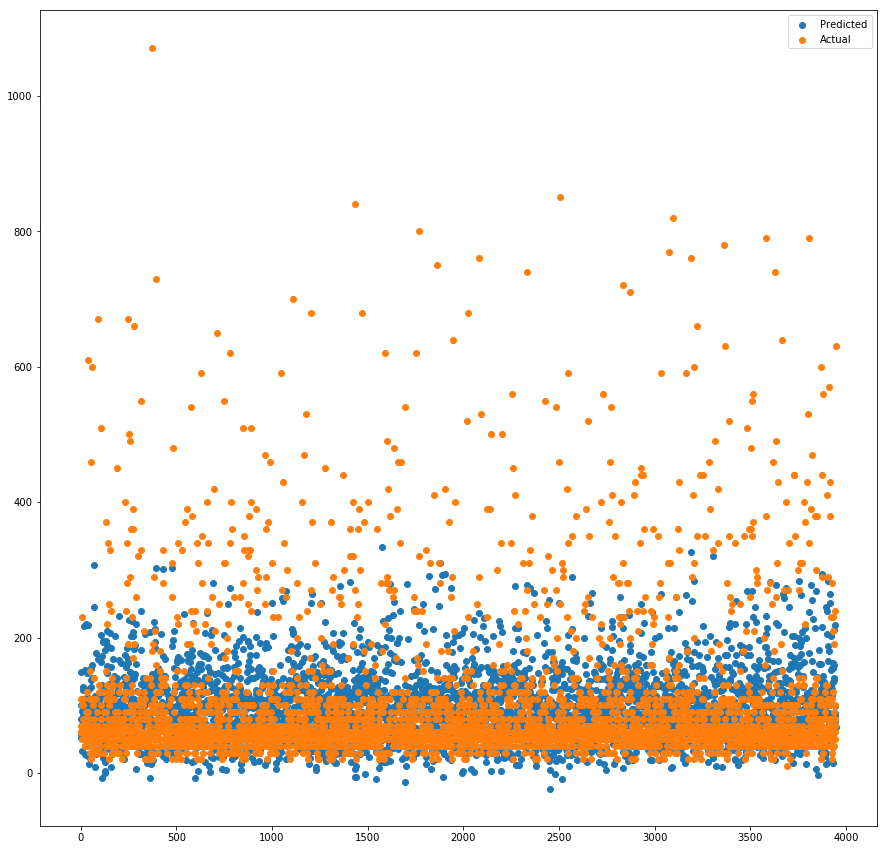

In [35]:
plt.figure(figsize=(15, 15))
i = np.arange(3947)
l1=plt.scatter(i,Ytest[:,0])
l2=plt.scatter(i,Ttest[:,0])
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

For the testing data, predicted and actual lights energy use

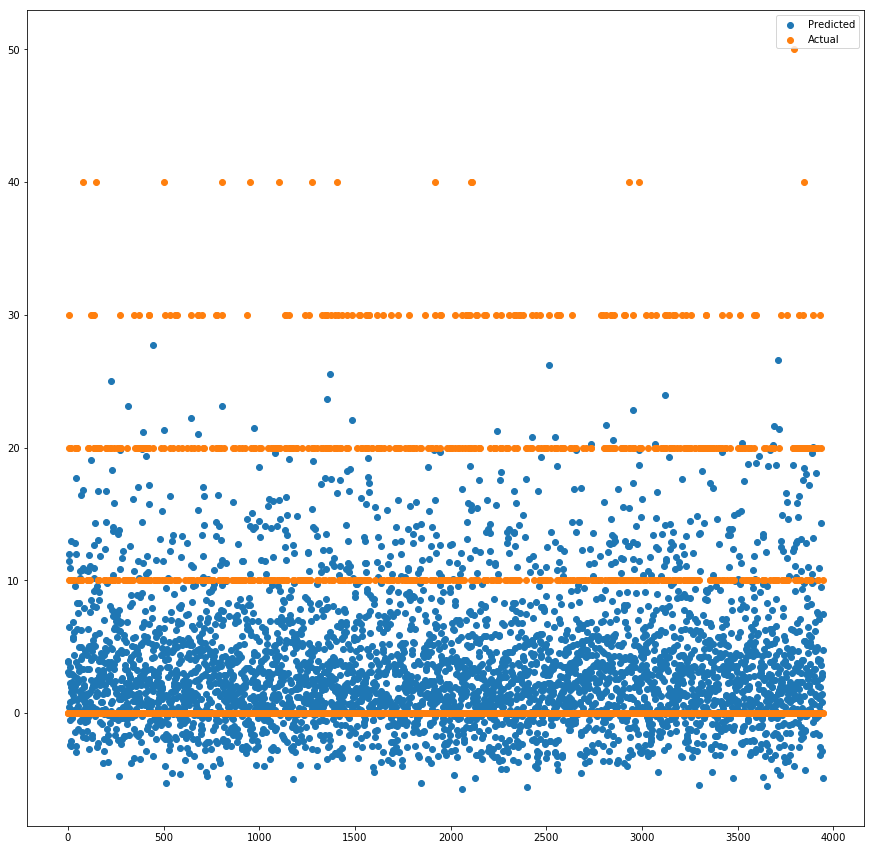

In [36]:
plt.figure(figsize=(15, 15))
i = np.arange(3947)
l1=plt.scatter(i,Ytest[:,1])
l2=plt.scatter(i,Ttest[:,1])
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

#### Discussions:
For plot, predicted vs actual Appliances energy the model got fairly good prediction. There are some outlier in data which the model does not predict well but in real world no data is perfect which directly means that no model will be as perfect.For second graph, because the actual values are some what linear, the model did even better job as compare to first for some points ie point that lies on 0th location of Y-axis.


## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     


In [37]:
#read .csv using pandas package
df2=pd.read_csv("Frogs_MFCCs.csv",header=None)
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
1,1,0.152936298220384,-0.105585902844019,0.200721914808566,0.317201062343259,0.260763853131077,0.100944640810053,-0.150062604917616,-0.17112763198601,0.124676436148438,...,-0.108351107221198,-0.0776225214037558,-0.00956780151914234,0.0576839754007957,0.118680135068692,0.0140384456733697,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1,0.171534257314109,-0.0989747371205295,0.268425220827017,0.338671862995453,0.268353099863332,0.0608350871920449,-0.222474640379244,-0.207692670568256,0.170882873543032,...,-0.0909740108032878,-0.0565095219192882,-0.035303356812479,0.0201399631478018,0.0822629868835422,0.0290557421631693,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1,0.152317085189856,-0.0829726738725973,0.287127957306532,0.276014083988895,0.189866772581424,0.00871395674901959,-0.242234230697363,-0.219153324384574,0.232538316574083,...,-0.0506914300740697,-0.0235902291809596,-0.0667215489148675,-0.0250832267732169,0.0991083997463254,0.0771623846958952,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1,0.22439244572155,0.118984663992927,0.329431728991851,0.37208800967925,0.36100456768708,0.0155010402636969,-0.1943474518771,-0.0981806677778217,0.270375424774079,...,-0.13600940404278,-0.177037008525031,-0.130498132704666,-0.0547663962602304,-0.018691446529289,0.0239543085482256,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1,0.0878169091598283,-0.0683448878848087,0.306966720688553,0.330922940689476,0.249143914245263,0.00688371297114425,-0.265423361986448,-0.172699811727761,0.266434260043502,...,-0.0488846180288039,-0.0530735072212773,-0.0885504031444007,-0.0313455727580116,0.108609831720118,0.0792443322969332,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1,0.0997037443473087,-0.0334078182287543,0.349895055123958,0.344535329026687,0.247568759825133,0.0224069570042632,-0.213767158106655,-0.127915977596892,0.277352618080055,...,-0.0804874618930624,-0.130089219910283,-0.171477611096457,-0.0715693987933071,0.0776429543728141,0.0649025871698588,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1,0.0216756390813221,-0.0620752914531054,0.318229461055719,0.380439101953914,0.179042904800709,-0.0416665676598535,-0.252299868762378,-0.167117027668498,0.220027216778489,...,-0.0466202523470996,-0.0551461184754089,-0.085971746729402,-0.00912682052745849,0.0656303577934855,0.0440404903196165,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1,0.145130379393796,-0.0336602151402735,0.284166085421286,0.279537342192464,0.175210684017332,0.00579147281058601,-0.183329275921471,-0.158483127787544,0.192567048841457,...,-0.0559778411979371,-0.0482189587421892,-0.0566366211144573,-0.0224187451862948,0.0700845851898373,0.0214193585161363,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1,0.271326131375548,0.0277769870564642,0.375738310878494,0.385432287352579,0.272456994451337,0.0981920318214934,-0.173729644582851,-0.157856955666402,0.207180655723292,...,-0.120722603785949,-0.112607447683261,-0.156933071310349,-0.118527113094033,-0.00247110657871239,0.0023042105916592,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [38]:
d=df2.drop(df1.index[[0]])   #drop first row of ID'S
tmp=d.values # change to numpy array
Tanuran=tmp[:,24:-1] # get target T
Xanuran_str=tmp[:,1:22]  # get X


In [39]:
Xanuran=Xanuran_str.astype(np.float) # chnage values of string to float
# COvert this to make sure that while getiing error trace, we don't get errror for sqrt not perform on float number
X_new=np.float64(Xanuran)



In [40]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [41]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [42]:
# Give unique class number to unique elements in Target varaible
Tanuran[Tanuran=='AdenomeraAndre']=0
Tanuran[Tanuran=='Ameeregatrivittata']=2
Tanuran[Tanuran=='AdenomeraHylaedactylus']=1
Tanuran[Tanuran=='HylaMinuta']=3
Tanuran[Tanuran=='HypsiboasCinerascens']=4
Tanuran[Tanuran=='HypsiboasCordobae']=5
Tanuran[Tanuran=='LeptodactylusFuscus']=6
Tanuran[Tanuran=='OsteocephalusOophagus']=7
Tanuran[Tanuran=='Rhinellagranulosa']=8
Tanuran[Tanuran=='ScinaxRuber']=9
T_new=np.float64(Tanuran)

In [43]:
Tanuran[:2]

array([[0],
       [0]], dtype=object)

In [44]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


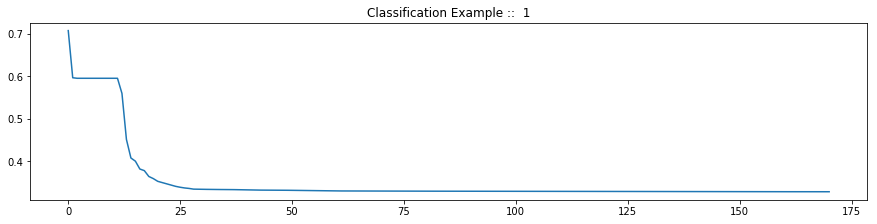

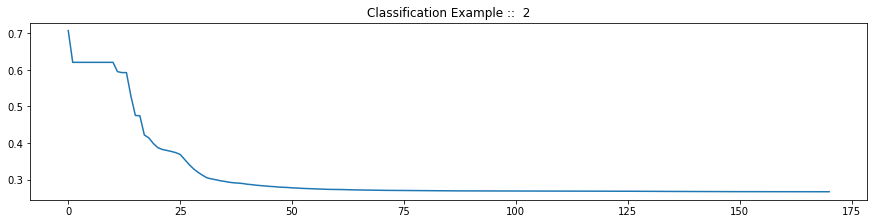

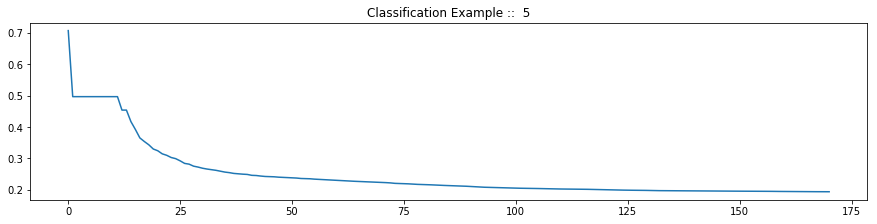

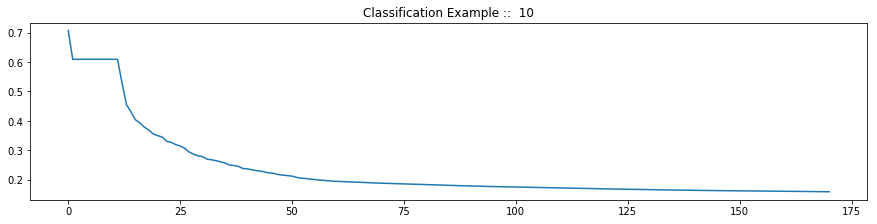

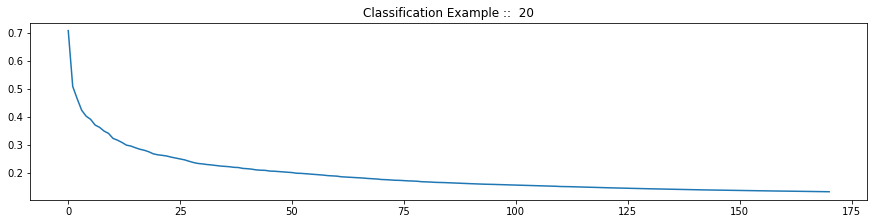

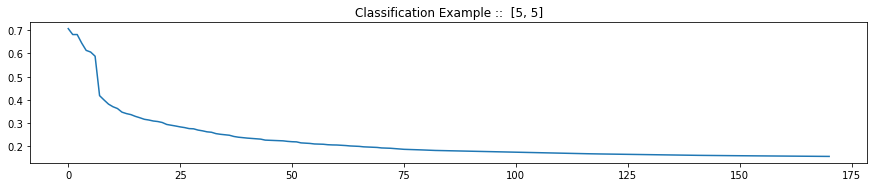

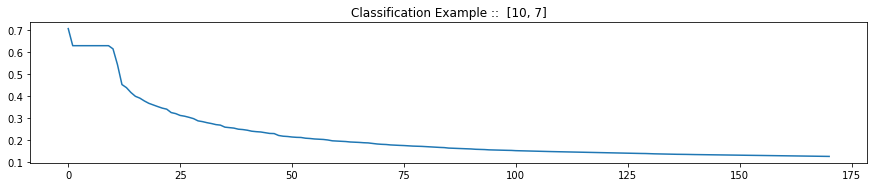

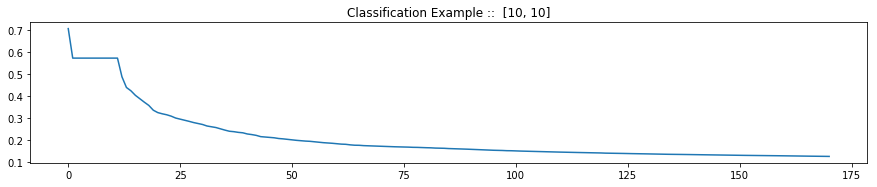

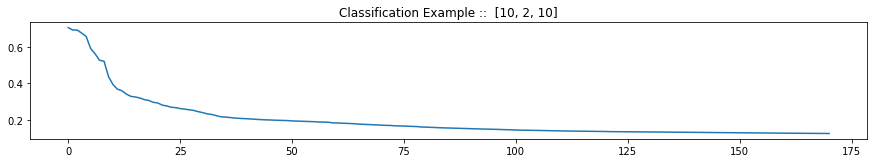

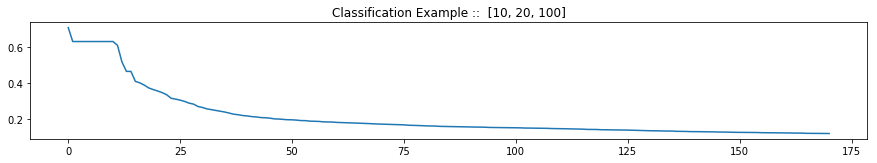

In [45]:
hiddenLayers=[1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]]
for hiddenlayer in hiddenLayers:
    Xtrain,Ttrain, Xtest, Ttest= ml.partition(X_new,T_new,(0.8,0.2),classification=True)
    nnet = nn.NeuralNetwork(X_new.shape[1],hiddenlayer, T_new.shape[1])
    nnet.train(Xtrain, Ttrain, 170)
    
    Y =nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    Get_err=nnet.getErrorTrace()
    plt.figure(figsize=(15, 15))
    if(nnet.nhs==None):
        nnet.nhs=[0]
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers
    plt.subplot(nPlotRows, 1, 1)
    plt.plot(Get_err)
    plt.title('Classification Example ::  ' + str(hiddenlayer))
  


From above graph, 170 iteration should be reasonable count that goes with all hidden structures.

In [46]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 170, classify=True)

In [47]:
summarize(results)

[[0, 0.11073662265462128, 0.11438498957609448, 0.41329145431518555],
 [5, 0.35555941626129262, 0.35774843641417647, 0.5103616714477539],
 [[5, 5], 0.45416956219596943, 0.45364836692147331, 0.49735283851623535]]

In [48]:
bestNetwork(summarize(results))

[0, 0.11073662265462128, 0.11438498957609448, 0.41329145431518555]

In [49]:
results = trainNNs(Xanuran, Tanuran, 0.6, [1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]], 5, 170, classify=True)

In [50]:
summarize(results)

[[1, 0.51656242761176741, 0.51667824878387769, 0.45432114601135254],
 [2, 0.47157748436414176, 0.47261987491313417, 0.3932790756225586],
 [5, 0.3198054204308548, 0.3186240444753301, 0.423297643661499],
 [10, 0.25740097289784575, 0.25879082696316885, 0.4102914333343506],
 [20, 0.20778318276580959, 0.21063238359972206, 0.506356954574585],
 [[5, 5], 0.45735464442900164, 0.45795691452397502, 0.4433143138885498],
 [[10, 7], 0.46235811906416496, 0.46261292564280748, 0.4375879764556885],
 [[10, 10], 0.46078295112346535, 0.46205698401667822, 0.5930206775665283],
 [[10, 2, 10], 0.49668751447764653, 0.49749826268241837, 0.654221773147583],
 [[10, 20, 100], 0.40792216817234195, 0.41042390548992358, 1.659172773361206]]

In [51]:
bestNetwork(summarize(results))

[20, 0.20778318276580959, 0.21063238359972206, 0.506356954574585]

In [52]:
results = trainNNs(Xanuran, Tanuran, 0.8, [20], 5, 170, classify=True)

In [53]:
summarize(results)

[[20, 0.18644892286309939, 0.18943710910354414, 0.6084311008453369]]

In [54]:
Ttest.shape

(1439, 1)

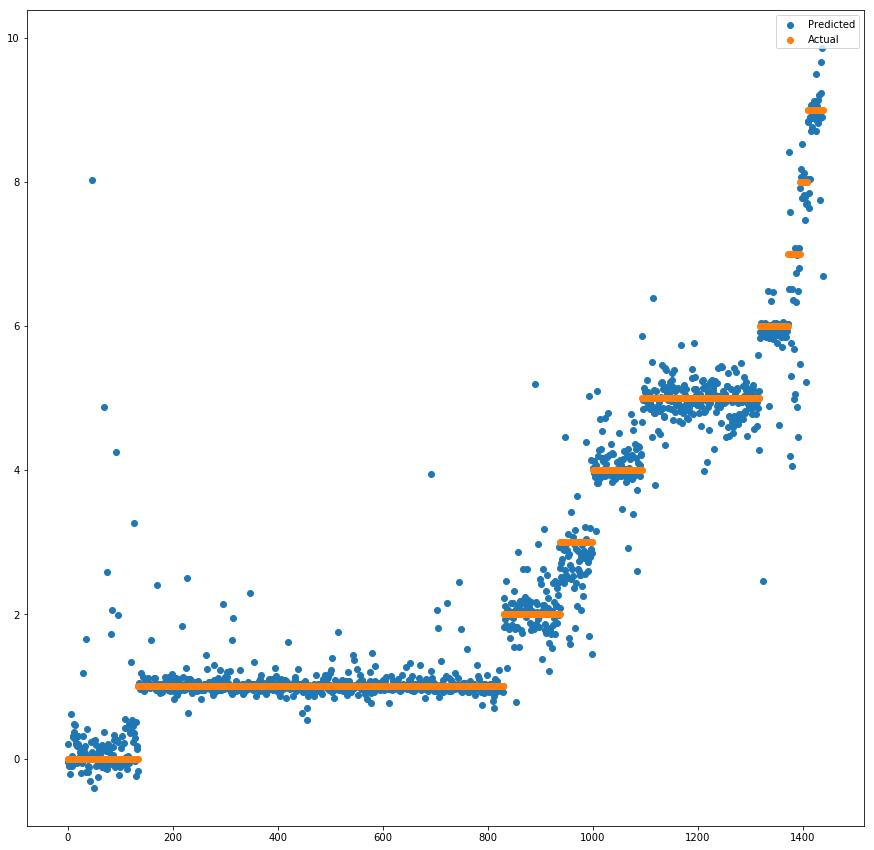

In [55]:
plt.figure(figsize=(15, 15))
i = np.arange(1439)
l1=plt.scatter(i,Ytest[:,0])
l2=plt.scatter(i,Ttest[:,0])
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

From above graph, the predicted values for species are really close for some points. The best test accuracy got after running for 10 different hidden structure and with 170 iteration,is  around 82 percent. Each class are shown above are with orange vertical line. For all of class the nueral network predicted class close to what was expected. There are outlier in graph whohc our model could not predict what class it falls under but even looking at data, it is not normally dirstributed. Following is summary of best nureal network structure.   

Hidden Layers 20 Average RMSE Training 0.19 Testing 0.19 Took 0.81 seconds


## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [56]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

---  0/20 points. Network [20, 20] should be best.  You found 0 as the best.

C:\Users\waradepratik Execution Grade is 40/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 points. Tra

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A6.ipynb```.  So, for me it would be ```Anderson-A3.ipynb```.  Submit the file using the ```Assignment 3``` link on [Canvas](https://colostate.instructure.com/courses/41327).

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  


# Extra Credits
## Regression Dataset

For this, I am using housing dataset from UCI repository. Here is link for it. https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

###### Data Set Information:  

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data  


##### Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [57]:
df=pd.read_csv("day.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822


Removing first two columns as cols 13 and 14. The target valraible will be last col. i.e total count of registered and casual bike drivers.

In [58]:
names_lists=df[0:1].values.tolist()                
names=names_lists[0]
remove_names=['instant','dteday','casual','registered']
for w in remove_names:
    names.remove(w)

In [59]:
names

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [60]:
d=df.drop(df.index[[0]])   #drop first col of ID'S
tmp=d.values
tmp

array([['1', '2011-01-01', '1', ..., '331', '654', '985'],
       ['2', '2011-01-02', '1', ..., '131', '670', '801'],
       ['3', '2011-01-03', '1', ..., '120', '1229', '1349'],
       ..., 
       ['729', '2012-12-29', '1', ..., '159', '1182', '1341'],
       ['730', '2012-12-30', '1', ..., '364', '1432', '1796'],
       ['731', '2012-12-31', '1', ..., '439', '2290', '2729']], dtype=object)

In [61]:
T_str= tmp[:, 10:11]
T=T_str.astype(np.float)
X_str = tmp[:, 2:10]
X=X_str.astype(np.float)
X


array([[  1.  ,   0.  ,   1.  , ...,   0.  ,   2.  ,   0.34],
       [  1.  ,   0.  ,   1.  , ...,   0.  ,   2.  ,   0.36],
       [  1.  ,   0.  ,   1.  , ...,   1.  ,   1.  ,   0.2 ],
       ..., 
       [  1.  ,   1.  ,  12.  , ...,   0.  ,   2.  ,   0.25],
       [  1.  ,   1.  ,  12.  , ...,   0.  ,   1.  ,   0.26],
       [  1.  ,   1.  ,  12.  , ...,   1.  ,   2.  ,   0.22]])

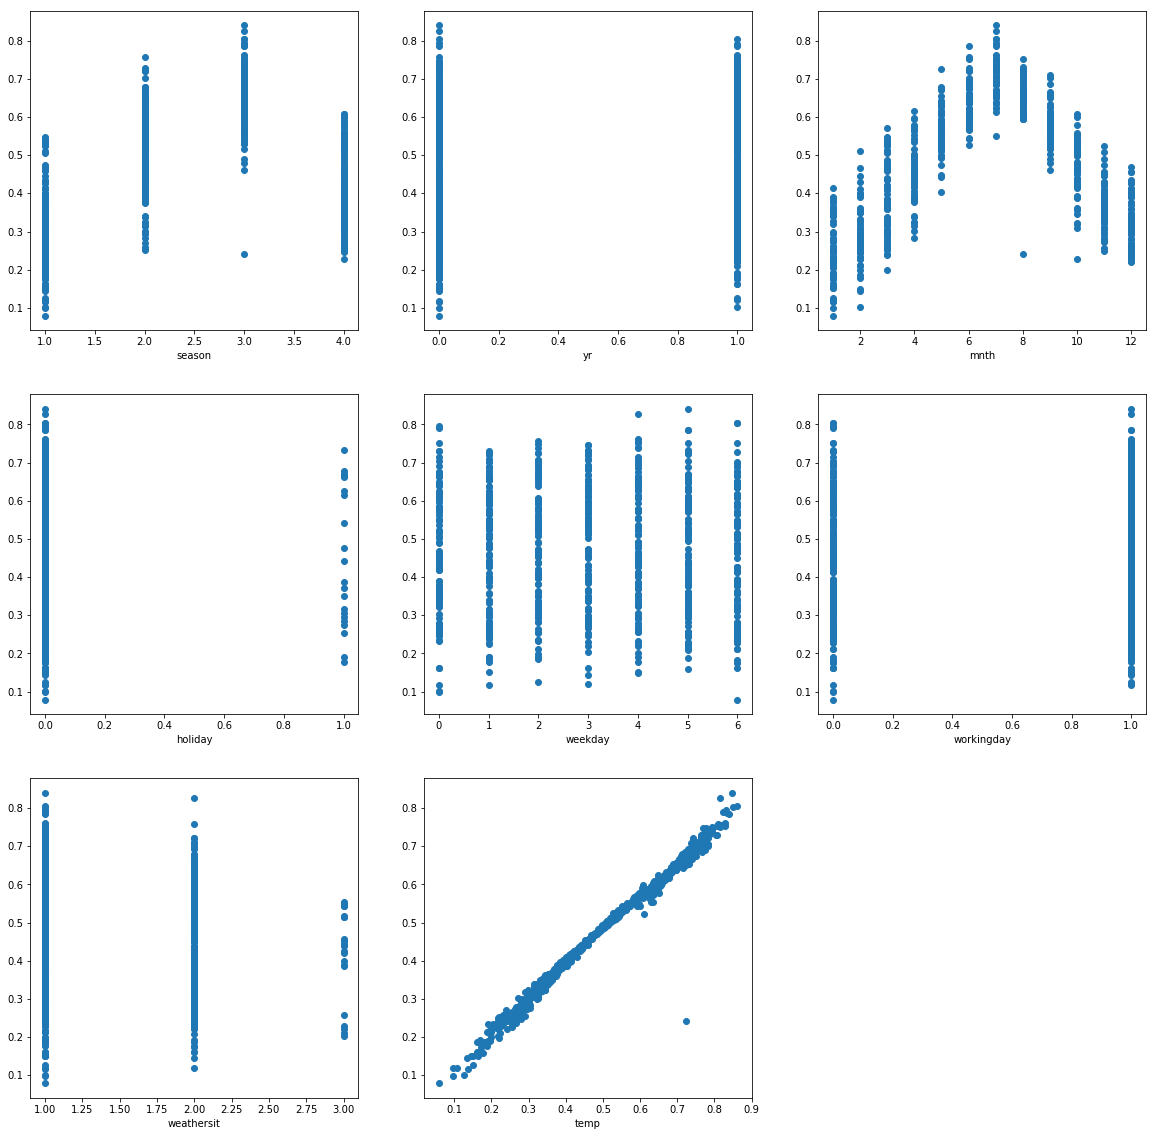

In [62]:
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(3,3, i+1)
    plt.plot(X[:,i],T,'o')
    plt.xlabel(names[i])
    

Some features above does show kind of linearity but using all the feature make more sense. As, climate conditions, holidays etc in names list does impact on how the bikes are used. So, I did not use just one feature even it seems to be kind of linear.

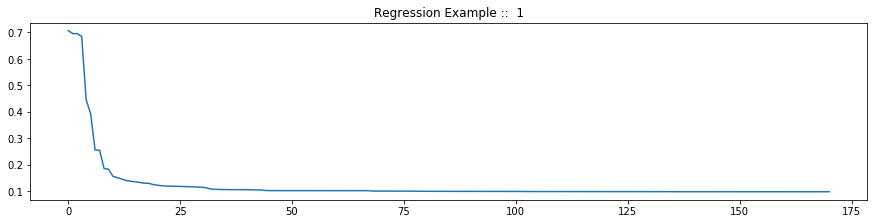

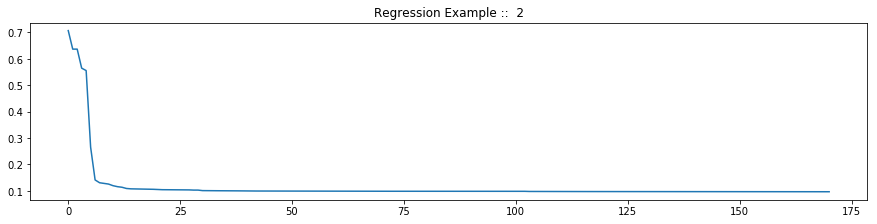

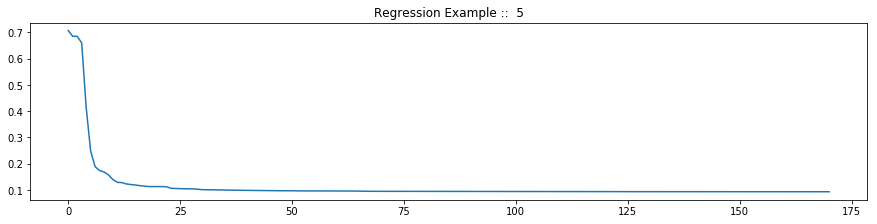

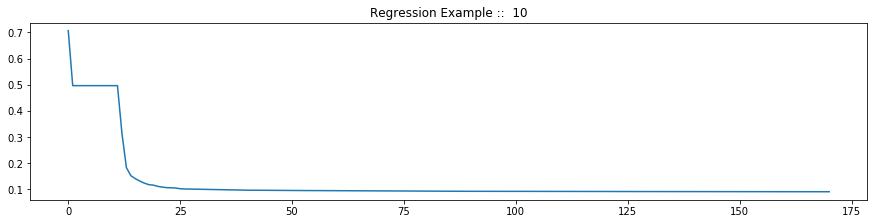

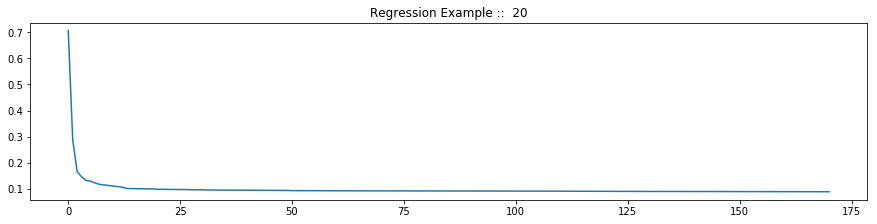

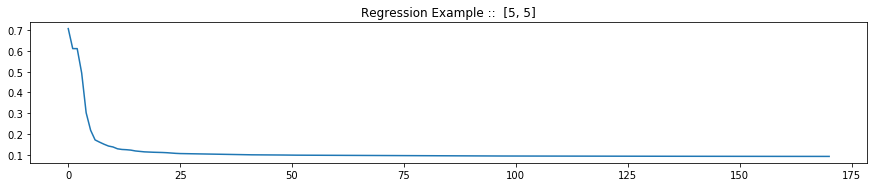

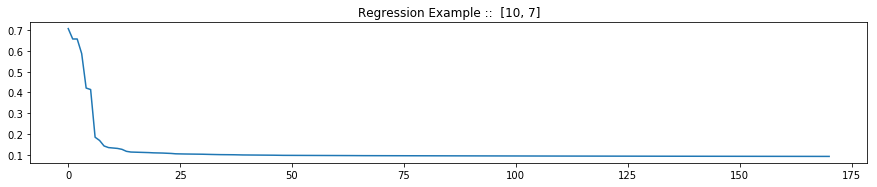

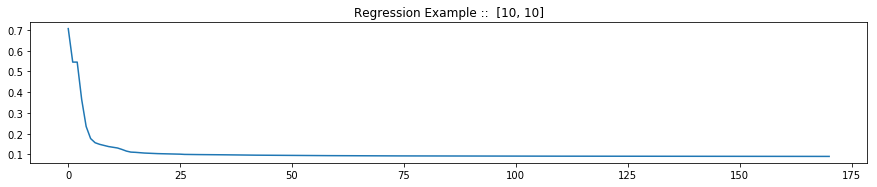

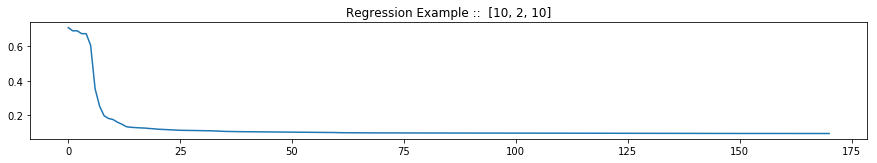

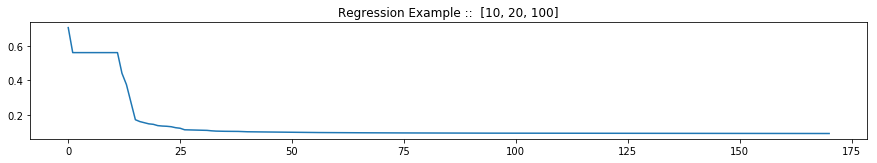

In [63]:
hiddenLayers=[1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]]
for hiddenlayer in hiddenLayers:
    Xtrain,Ttrain, Xtest, Ttest= ml.partition(X,T,(0.8,0.2),classification=False)
    nnet = nn.NeuralNetwork(X.shape[1],hiddenlayer, T.shape[1])
    nnet.train(Xtrain, Ttrain, 170)
    
    Y =nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    Get_err=nnet.getErrorTrace()
    plt.figure(figsize=(15, 15))
    if(nnet.nhs==None):
        nnet.nhs=[0]
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers
    plt.subplot(nPlotRows, 1, 1)
    plt.plot(Get_err)
    plt.title('Regression Example ::  ' + str(hiddenlayer))
  


For this dataset, n60 number of iteration is good option as in above plot , we can see that error trace remains constant.

In [64]:
results = trainNNs(X, T, 0.6, [1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]], 10, 60,classify=False)

In [65]:
summarize(results)

[[1, 0.093759701890334279, 0.09298112003054354, 0.05103421211242676],
 [2, 0.078268499821837617, 0.077122557153996352, 0.05303812026977539],
 [5, 0.072276000387752448, 0.073543204152457881, 0.047033071517944336],
 [10, 0.10252520249190933, 0.10262920098102861, 0.06104326248168945],
 [20, 0.050450008139715785, 0.050012623465477898, 0.11608409881591797],
 [[5, 5], 0.087721551264236891, 0.089760466284628984, 0.07905268669128418],
 [[10, 7], 0.087938497696631895, 0.089186675488839212, 0.08706164360046387],
 [[10, 10], 0.077889512709200928, 0.080515899351431469, 0.19313859939575195],
 [[10, 2, 10], 0.10179588769500707, 0.10589899172308573, 0.11908316612243652],
 [[10, 20, 100],
  0.087812305414856587,
  0.085324262120617944,
  0.4603276252746582]]

In [66]:
bestNetwork(summarize(results))

[20, 0.050450008139715785, 0.050012623465477898, 0.11608409881591797]

Training for best hidden structure found with 0.8 training and 0.2 testing data.

In [67]:
results = trainNNs(X, T, 0.8, [20], 10, 60,classify=False)

In [68]:
summarize(results)

[[20, 0.054905908786089773, 0.06321968671654235, 0.13509535789489746]]

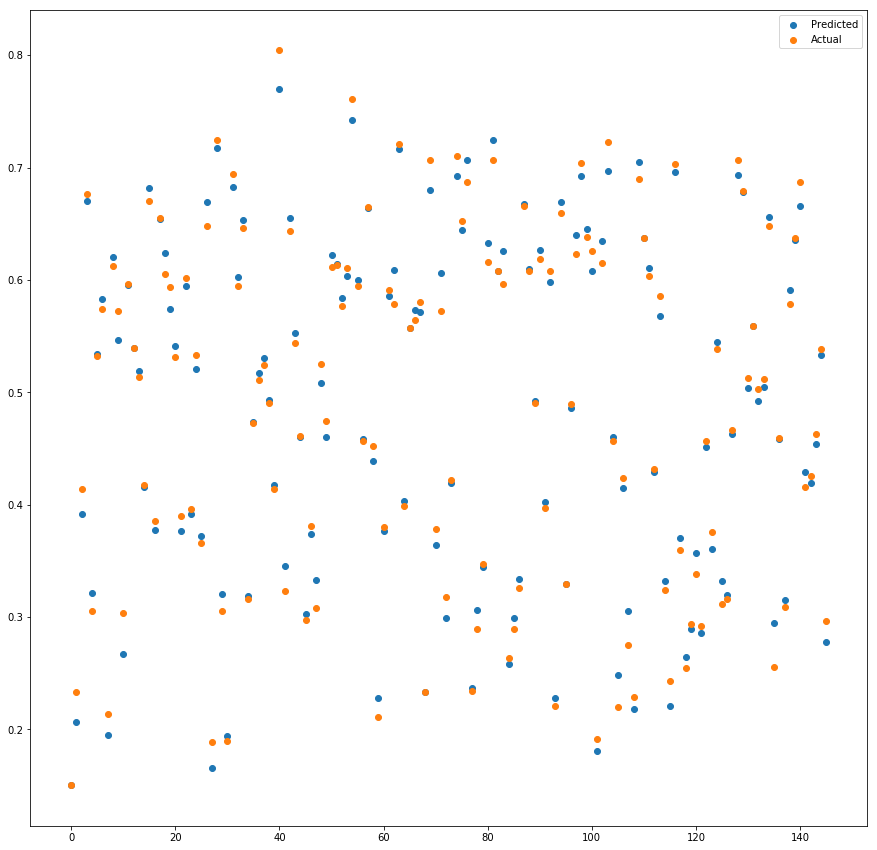

In [69]:
plt.figure(figsize=(15, 15))
i = np.arange(146)
l1=plt.scatter(i,Ytest[:,0])
l2=plt.scatter(i,Ttest[:,0])
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

The predicted values are very close to actual value. Also,even before running I got sense by looking at error trace that for small iteration it remain constant. This might be because the data has some linearity or the structure of neural network that I gave suited best for this dataset.

#### Classification Dataset.
In this, I am going to use fertility dataset form UCI repository. https://archive.ics.uci.edu/ml/datasets/Fertility.
Features in Dataset are:  

Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

Age at the time of analysis. 18-36 (0, 1) 

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1) 

Accident or serious trauma 1) yes, 2) no. (0, 1) 

Surgical intervention 1) yes, 2) no. (0, 1) 

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

Number of hours spent sitting per day ene-16 (0, 1) 

Output: Diagnosis normal (N), altered (O) 


I am going to use all the feature as each of them are releveant and contributes to weather  the sperm sample collected by WHO was normal or altered. In  this dataset the ouptput colomns are 'N' for normal and 'O' for altered. This I convereted to class 1 and class of 0 respectively.


In [70]:
df1=pd.read_csv("fertility.txt",header=None)
df1
name=['season','age','child-diease','surgery','taruma','fever','alcohol','somking','hrs of relaxing']

In [71]:
tmp=df1.values # change to numpy array

In [72]:
T=tmp[:,-1] # get target T
X_raw=tmp[:,:-1]  # get X
# Give unique class number to unique elements in Target varaible
T[T=='N']=0
T[T=='O']=1
T_raw=T.reshape( (X_raw.shape[0], 1) )
X=np.float64(X_raw)
T=np.float64(T_raw)

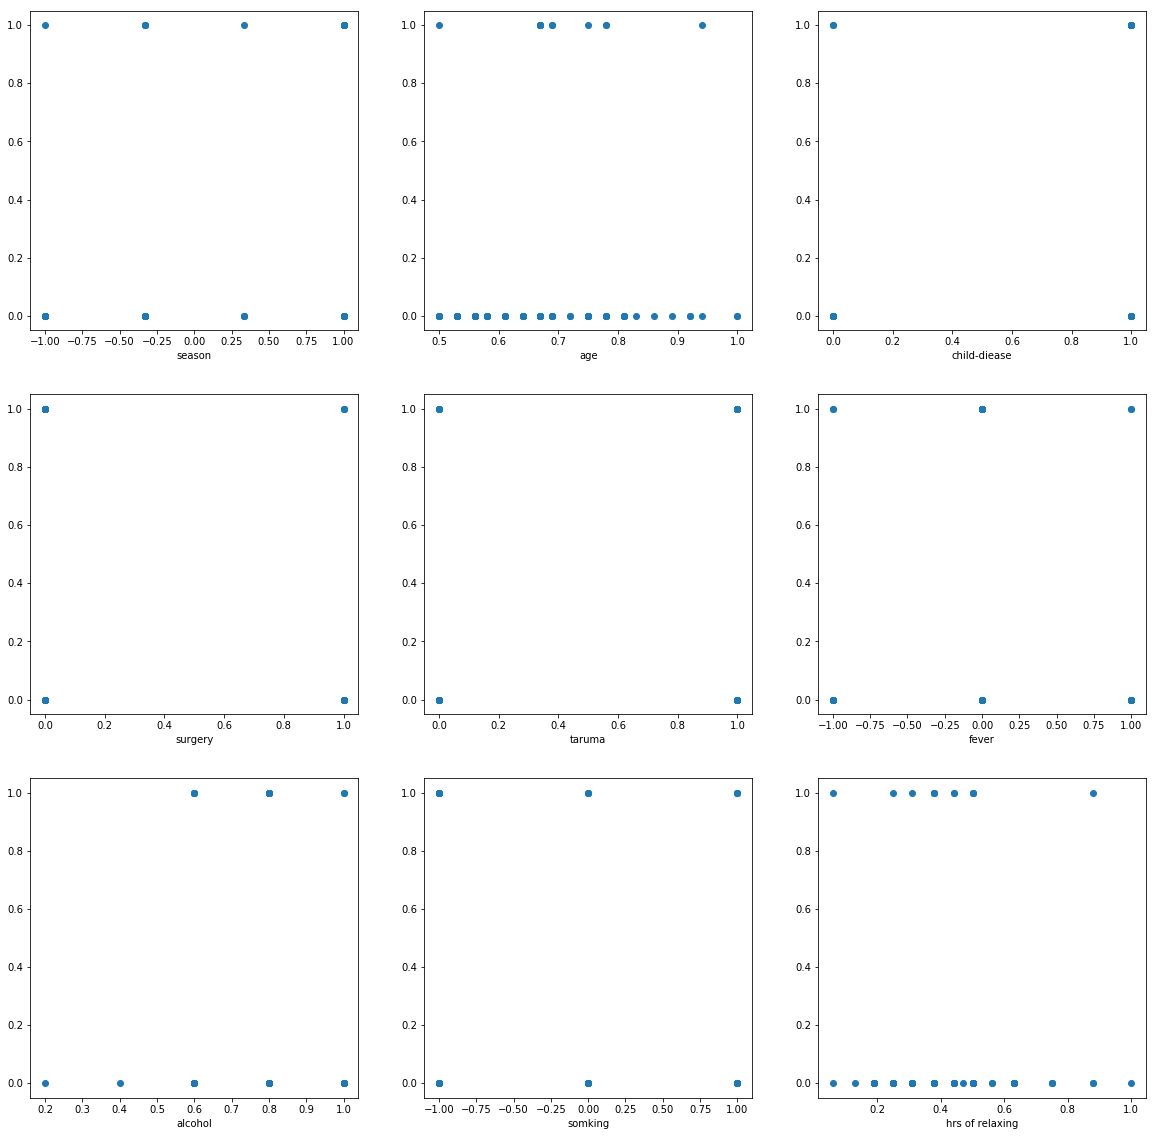

In [73]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.plot(X[:,i],T,'o')
    plt.xlabel(name[i])
    
   

From above plots of features, the feature sets are disperse and cannot be used alone to classify any variable so combination of feature set will be useful.

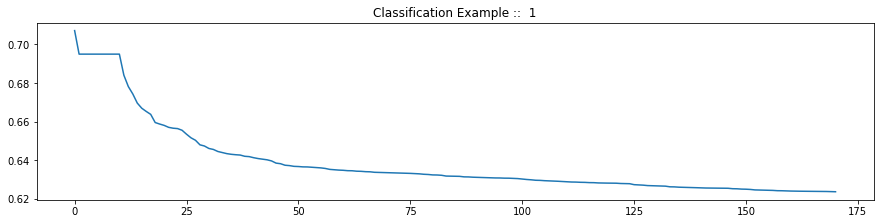

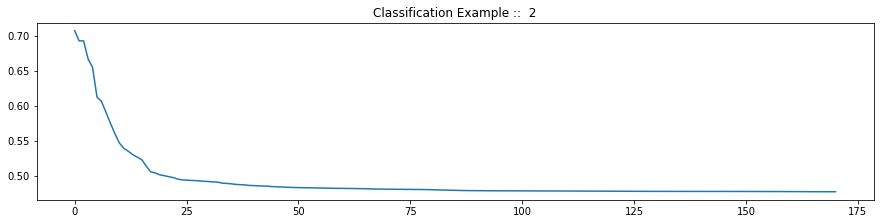

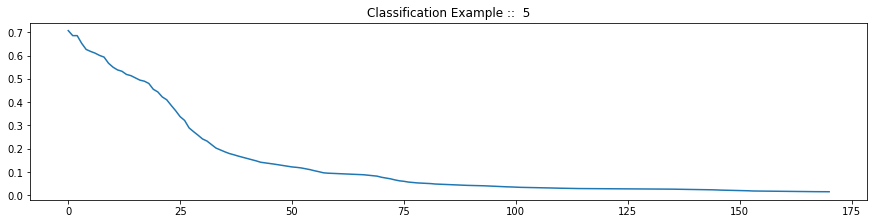

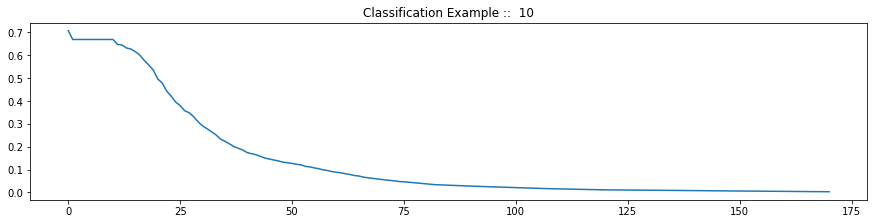

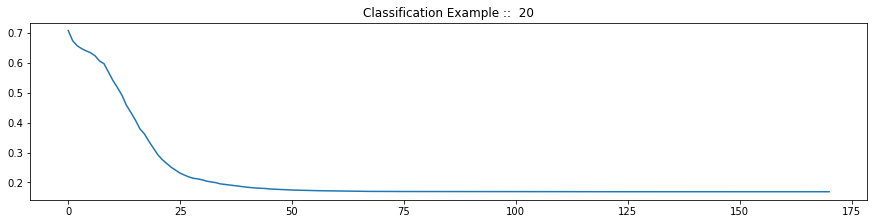

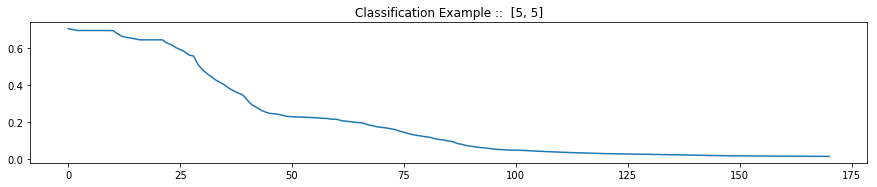

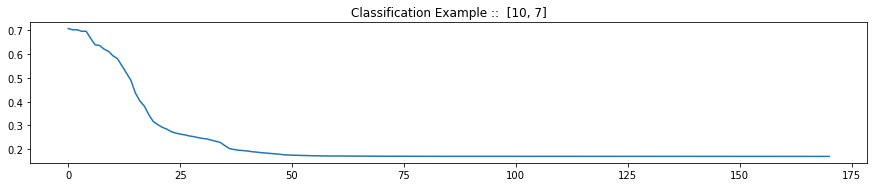

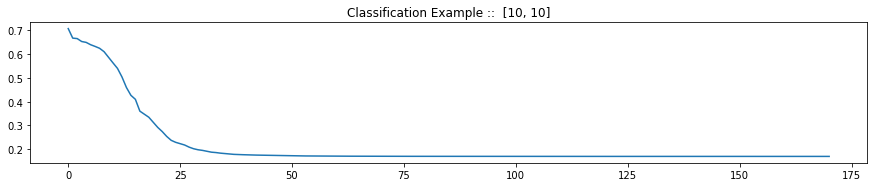

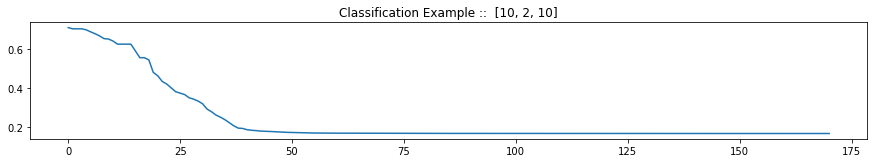

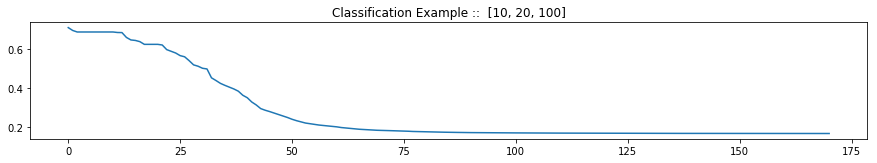

In [74]:
hiddenLayers=[1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]]
for hiddenlayer in hiddenLayers:
    Xtrain,Ttrain, Xtest, Ttest= ml.partition(X,T,(0.8,0.2),classification=True)
    nnet = nn.NeuralNetwork(X.shape[1],hiddenlayer, T.shape[1])
    nnet.train(Xtrain, Ttrain, 170)
    
    Y =nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    Get_err=nnet.getErrorTrace()
    plt.figure(figsize=(15, 15))
    if(nnet.nhs==None):
        nnet.nhs=[0]
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers
    plt.subplot(nPlotRows, 1, 1)
    plt.plot(Get_err)
    plt.title('Classification Example ::  ' + str(hiddenlayer))
  


In [75]:
results = trainNNs(X, T, 0.6, [1,2,5,10,20, [5, 5],[10, 7], [10, 10], [10,2,10],[10,20,100]], 5, 150, classify=True)

In [76]:
summarize(results)

[[1, 0.11666666666666667, 0.125, 0.02301478385925293],
 [2, 0.11666666666666667, 0.13999999999999999, 0.02201676368713379],
 [5, 0.11666666666666667, 0.125, 0.01801300048828125],
 [10, 0.10000000000000001, 0.13500000000000001, 0.018010377883911133],
 [20, 0.096666666666666651, 0.21999999999999997, 0.015011072158813477],
 [[5, 5], 0.11333333333333333, 0.13999999999999999, 0.014009952545166016],
 [[10, 7], 0.10999999999999999, 0.155, 0.02101612091064453],
 [[10, 10], 0.11000000000000001, 0.13500000000000001, 0.024016141891479492],
 [[10, 2, 10], 0.11666666666666667, 0.125, 0.02601790428161621],
 [[10, 20, 100], 0.11000000000000001, 0.155, 0.0600430965423584]]

In [77]:
bestNetwork(summarize(results))

[1, 0.11666666666666667, 0.125, 0.02301478385925293]

Running on best network found with training data 80% and 20 % test.

In [78]:
results = trainNNs(X, T, 0.8, [10,7], 5, 150, classify=True)

In [79]:
bestNetwork(summarize(results))

[10, 0.12250000000000001, 0.089999999999999997, 0.02401900291442871]

In [80]:
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*bestNetwork(summarize(results))))

Hidden Layers 10 Average RMSE Training 0.12 Testing 0.09 Took 0.02 seconds


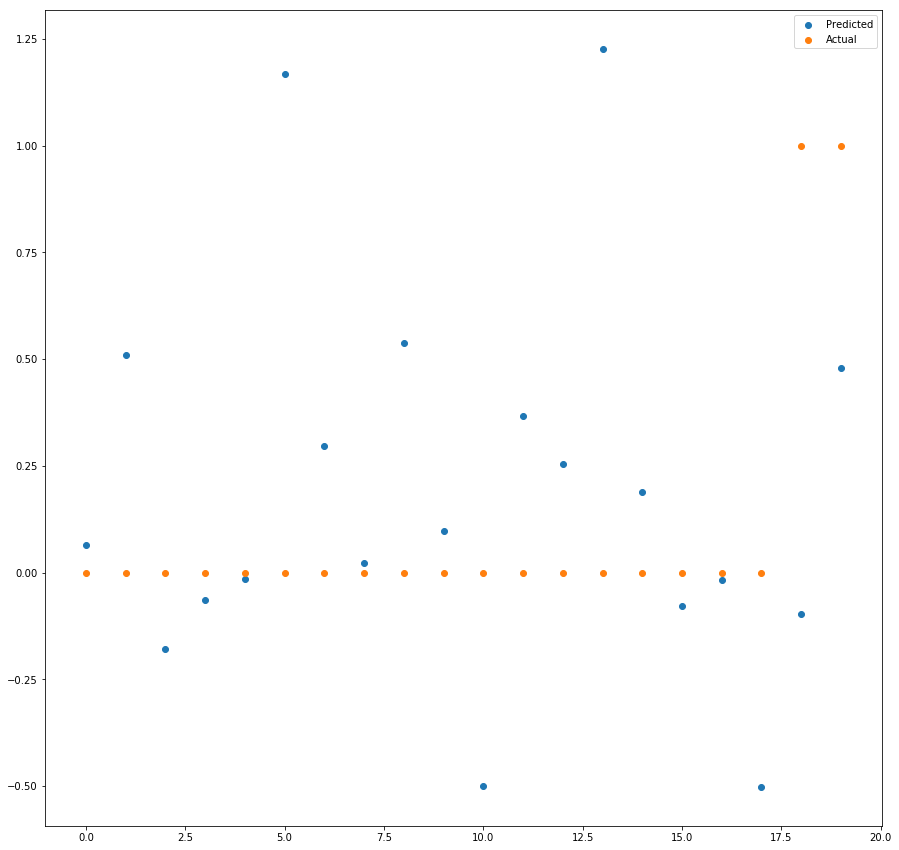

In [81]:
plt.figure(figsize=(15, 15))
i = np.arange(20)
l1=plt.scatter(i,Ytest[:,0])
l2=plt.scatter(i,Ttest[:,0])
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

For above data, the best hidden structure found was [10,7] with 100 iterations. Also, the test performace was lowest i.e 0.10 and from the above graph the predicted value do fall near actual poit expect some outliers in data.